In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt

# question 1

In [2]:
def answer(question, w):
    if np.dot(question, w) > 0:
        an = 1
    else:
        an = 0
    return an

In [3]:
#learning
def learn(w,w_star,question_node, question_number):
    ww_s = [np.dot(w,w_star)/(np.linalg.norm(w) * np.linalg.norm(w_star))]
    for m in range(question_number):
        question = np.asarray([-1] + [random.choice([-1,1]) for i in range(question_node)])
        S = answer(question,w)
        T = answer(question,w_star)
        w = w + (T-S) * question
        ww = np.dot(w,w_star)/(np.linalg.norm(w) * np.linalg.norm(w_star))
        ww_s.append(ww)
    return ww_s

In [4]:
#simulation
#first, with node = 10
question_node_1 = 10
question_number_1 = 100
w_star = np.asarray([1] + [random.choice([-1,1]) for i in range(question_node_1)])
w = np.asarray([3] + [1/2] * question_node_1)
ww_s1 = []
for n in range(20):
    ww = learn(w,w_star, question_node_1, question_number_1)
    ww_s1.append(ww)

#second, with node = 100
question_node_2 = 100
question_number_2 = 2000
w_star = np.asarray([1] + [random.choice([-1,1]) for i in range(question_node_2)])
w = np.asarray([3] + [1/2] * question_node_2)
ww_s2 = []
for n in range(20):
    ww = learn(w,w_star, question_node_2, question_number_2)
    ww_s2.append(ww)

#thirf, with node = 1000
question_node_3 = 1000
question_number_3 = 20000
w_star = np.asarray([1] + [random.choice([-1,1]) for i in range(question_node_3)])
w = np.asarray([3] + [1/2] * question_node_3)
ww_s3 = []
for n in range(20):
    ww = learn(w,w_star, question_node_3, question_number_3)
    ww_s3.append(ww)


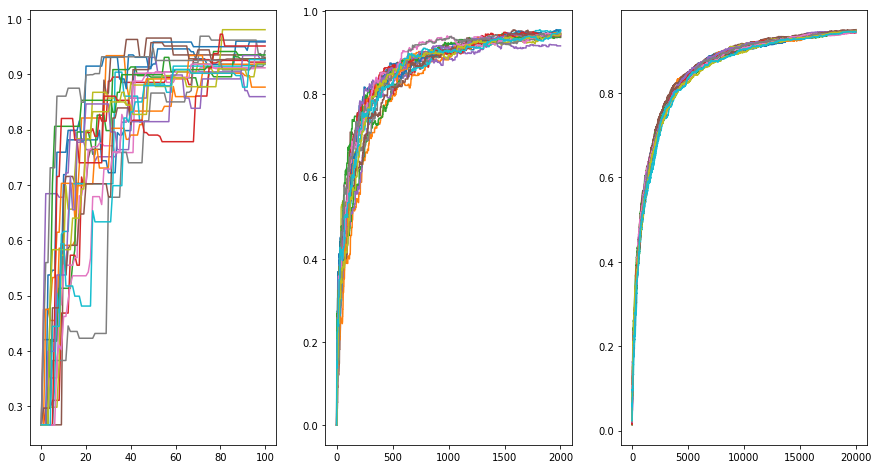

In [13]:
plt.figure(figsize=(15, 8))

plt.subplot(131)
for i in range(len(ww_s1)):
    plt.plot(ww_s1[i])


plt.subplot(132)
for i in range(len(ww_s2)):
    plt.plot(ww_s2[i])

plt.subplot(133)
for i in range(len(ww_s3)):
    plt.plot(ww_s3[i])
plt.show()

as we can see from the graph, w have the tendency to converge to 1. However, with more note, the converage speed could be much more slower. Of course, with more note, the training speed is much more slower, too 

# question 2

In [24]:
#code precetron learning method
from sklearn.linear_model import Perceptron


X = [[1,1,1], [1,0,1], [0,0,0], [1,0,0],[0,1,0],[0,0,1],[1,1,0],[0,1,1]]
y = [1,1,0,0,0,0,0,0]
per_clf = Perceptron(random_state = 42)
per_clf.fit(X,y)

per_clf.score(X,y)

/Users/wangj3475/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


1.0

i use the sklearn perception package to do the perception learning. Since, i use all the possible case to train the model, the prediction rate is 100%

# question 3

In [2]:
import tensorflow as tf

x = tf.Variable(3, name = "x")
y = tf.Variable(5, name = "y")
z = tf.Variable(7, name = "z")

f = x**2 + y**2 + z**2 + x*y*z + 2*x*y + z + 1

In [6]:
init = tf.global_variables_initializer()

sees = tf.InteractiveSession()
init.run()
result = f.eval()
print(result)

226


In [21]:
# TensorFlow Graph visualizer code
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script src="//cdnjs.cloudflare.com/ajax/libs/polymer/0.3.3/platform.js"></script>
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [22]:
show_graph(tf.get_default_graph().as_graph_def())

the graph shows how tensorflow compute the equation using graph.